In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

from google.colab import files


In [8]:
content_path = files.upload()
print(f"content_path->{content_path}")

Saving X.npy to X.npy
Saving Y.npy to Y.npy


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
!ls /content/

sample_data  X.npy  Y.npy


In [10]:
# x_l = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
# y_l = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")
x_l = np.load("/content/X.npy")
y_l = np.load("/content/Y.npy")

(-0.5, 63.5, 63.5, -0.5)

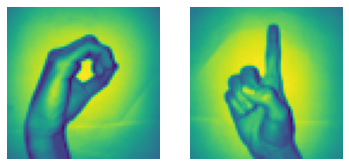

In [11]:
img_size = 64

plt.subplot(1 , 2 , 1)
plt.imshow(x_l[260].reshape(img_size , img_size))
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size , img_size))
plt.axis("off")

In [12]:
x = np.concatenate((x_l[204:409] , x_l[822:1027]),axis = 0)
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z , o) , axis = 0).reshape(x.shape[0],1)
print("x shape : ", x.shape)
print("y shape : ", y.shape)

x shape :  (410, 64, 64)
y shape :  (410, 1)


In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.15 , random_state = 42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [14]:
x_train_flatten = x_train.reshape(number_of_train , x_train.shape[1] * x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test , x_test.shape[1] * x_test.shape[2])
print("x train flatten " , x_train_flatten.shape)
print("x test flatten " , x_test_flatten.shape)

x train flatten  (348, 4096)
x test flatten  (62, 4096)


In [15]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_train.T
print("x train :" , x_train.shape)
print("x test : " , x_test.shape)
print("y train : " , y_train.shape)
print("y test : " , y_test.shape)

x train : (4096, 348)
x test :  (4096, 62)
y train :  (1, 348)
y test :  (348, 1)


# Artifical Neural Network (ANN)

In [16]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [17]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [18]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


In [19]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [20]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    

In [21]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [22]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [23]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

#parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

# ANN with keras

In [24]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 7)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.4698
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.6376
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.6980
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6577
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6644
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.7349
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.8356
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.8490
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.8792
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.8188
Epoch 11/

2/2 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9800
Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5184
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5017
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5017
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5017
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5017
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5017
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5017
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5017
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6622
Epoch 10/100
10/10 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.2912 - accuracy: 0.8776
Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4883
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5050
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5050
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5050
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5050
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5251
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6722
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.5719
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.7023
Epoch 10/100
10/10 [===